In [ ]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# to print plots inline
%matplotlib inline

In [2]:
# set our parameters
rho = 0.7605
mu = 0.0
sigma_eps = 0.213

# draw our shocks
num_draws = 100000 # number of shocks to draw
eps = np.random.normal(0.0, sigma_eps, size=(num_draws))

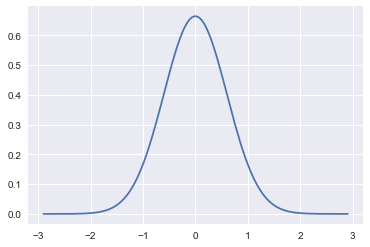

In [3]:
# Compute z
z = np.empty(num_draws)
z[0] = 0.0 + eps[0]
for i in range(1, num_draws):
    z[i] = rho * z[i - 1] + (1 - rho) * mu + eps[i]
# Remember here z is acually log(z)    

# plot distribution of z
# sns.distplot(z, hist=False)
sns.kdeplot(np.array(z), bw=0.5)

In [4]:
# theory says:
sigma_z = sigma_eps / ((1 - rho ** 2) ** (1 / 2))
print('Theoretical sigma_z = ', sigma_z)

Theoretical sigma_z =  0.3280264242800136


In [5]:
# import packages
from scipy.stats import norm

# Compute cut-off values
N = 9  # number of grid points (will have one more cut-off point than this)
z_cutoffs = (sigma_z * norm.ppf(np.arange(N + 1) / N)) + mu
print('Cut-off values = ', z_cutoffs)

Cut-off values =  [       -inf -0.40040229 -0.25084498 -0.14128994 -0.04582867  0.04582867
  0.14128994  0.25084498  0.40040229         inf]


In [6]:
# compute grid points for z
# Now z_grid is z rather than z_log
z_grid = np.exp((((N * sigma_z * (norm.pdf((z_cutoffs[:-1] - mu) / sigma_z)
                              - norm.pdf((z_cutoffs[1:] - mu) / sigma_z)))
              + mu)))
print('Grid points = ', z_grid)

Grid points =  [ 0.57170087  0.72611947  0.82344962  0.91128377  1.          1.09735302
  1.21440337  1.37718384  1.74916648]


In [7]:
# Transition matrix
# import packages
import scipy.integrate as integrate

# define function that we will integrate over
def integrand(x, sigma_z, sigma_eps, rho, mu, z_j, z_jp1):
    val = (np.exp((-1 * ((x - mu) ** 2)) / (2 * (sigma_z ** 2)))
            * (norm.cdf((z_jp1 - (mu * (1 - rho)) - (rho * x)) / sigma_eps)
               - norm.cdf((z_j - (mu * (1 - rho)) - (rho * x)) / sigma_eps)))
    
    return val

# compute transition probabilities
pi = np.empty((N, N))
for i in range(N):
    for j in range(N):
        results = integrate.quad(integrand, z_cutoffs[i], z_cutoffs[i + 1],
                                 args = (sigma_z, sigma_eps, rho, mu,
                                         z_cutoffs[j], z_cutoffs[j + 1]))
        pi[i,j] = (N / np.sqrt(2 * np.pi * sigma_z ** 2)) * results[0]
        
print('Transition matrix = ', pi)
print('pi sums = ', pi.sum(axis=0), pi.sum(axis=1))

Transition matrix =  [[  5.34646999e-01   2.33099908e-01   1.19241334e-01   6.16948412e-02
    3.06368282e-02   1.38694209e-02   5.27307457e-03   1.39972319e-03
    1.37871226e-04]
 [  2.33099908e-01   2.53066831e-01   1.95990939e-01   1.38221479e-01
    8.98690322e-02   5.26608516e-02   2.62024217e-02   9.48881413e-03
    1.39972319e-03]
 [  1.19241334e-01   1.95990939e-01   1.96744233e-01   1.70765394e-01
    1.33994761e-01   9.44950201e-02   5.72928238e-02   2.62024217e-02
    5.27307457e-03]
 [  6.16948412e-02   1.38221479e-01   1.70765394e-01   1.75481409e-01
    1.60693238e-01   1.32118347e-01   9.44950201e-02   5.26608516e-02
    1.38694209e-02]
 [  3.06368282e-02   8.98690322e-02   1.33994761e-01   1.60693238e-01
    1.69612281e-01   1.60693238e-01   1.33994761e-01   8.98690322e-02
    3.06368282e-02]
 [  1.38694209e-02   5.26608516e-02   9.44950201e-02   1.32118347e-01
    1.60693238e-01   1.75481409e-01   1.70765394e-01   1.38221479e-01
    6.16948412e-02]
 [  5.27307457e-03 

In [8]:
# Calculate the expectation of z'
exp_z_prime = np.dot(pi, z_grid)
exp_z_prime

array([ 0.68375623,  0.7993609 ,  0.8806827 ,  0.95337874,  1.0255741 ,
        1.10328372,  1.19413028,  1.31306453,  1.51742924])

In [9]:
# Using SS capital to get the grids of capital

In [10]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import time

# to print plots inline
%matplotlib inline

In [11]:
# specify parameters
alpha_k = 0.297
alpha_l = 0.650
delta = 0.154
psi = 1.08
w = 0.7
r = 0.04
z = 1

In [12]:
betafirm = (1 / (1 + r))

In [13]:
dens = 5
# put in bounds here for the capital stock space
kstar = ((((1 / betafirm - 1 + delta) * ((w / alpha_l) **
                                         (alpha_l / (1 - alpha_l)))) /
         (alpha_k * (z ** (1 / (1 - alpha_l))))) **
         ((1 - alpha_l) / (alpha_k + alpha_l - 1)))
kbar = 2*kstar
lb_k = 0.001
ub_k = kbar
krat = np.log(lb_k / ub_k)
numb = np.ceil(krat / np.log(1 - delta))
K = np.zeros(int(numb * dens))
# we'll create in a way where we pin down the upper bound - since
# the distance will be small near the lower bound, we'll miss that by little
for j in range(int(numb * dens)):
    K[j] = ub_k * (1 - delta) ** (j / dens)
kgrid = K[::-1]
sizek = kgrid.shape[0]

In [14]:
sizek

285

In [ ]:
k_linear = np.linspace(lb_k, ub_k, num=sizek)
plt.scatter(k_linear, kgrid)

# Value function iteration to get policy function of K prime

In [15]:
# operating profits, op
sizez = z_grid.shape[0]
op = np.zeros((sizez, sizek))
for i in range(sizez):
    for j in range(sizek):
        op[i,j] = ((1 - alpha_l) * ((alpha_l / w) ** (alpha_l / (1 - alpha_l))) *
      ((kgrid[j] ** alpha_k) ** (1 / (1 - alpha_l))) * (z_grid[i] ** (1/(1 - alpha_l))))

In [16]:
# firm cash flow, e
e = np.zeros((sizez, sizek, sizek))
for i in range(sizez):
    for j in range(sizek):
        for k in range(sizek):
            e[i, j, k] = (op[i,j] - kgrid[k] + ((1 - delta) * kgrid[j]) -
                       ((psi / 2) * ((kgrid[k] - ((1 - delta) * kgrid[j])) ** 2)
                        / kgrid[j]))

In [ ]:
np.shape(e)

In [17]:
# Value funtion iteration
VFtol = 1e-6
VFdist = 7.0
VFmaxiter = 3000
V = np.zeros((sizez, sizek))  # initial guess at value function
Vmat = np.zeros((sizez, sizek, sizek))  # initialize Vmat matrix
Vstore = np.zeros((sizez, sizek, VFmaxiter))  # initialize Vstore array
VFiter = 1

In [ ]:
np.shape(Vstore)

In [ ]:
np.shape(pi)

In [18]:
import numba

In [19]:
@numba.jit
def VFI_loop(V, e, betafirm, sizez, sizek, Vmat, pi):
    V_prime = np.dot(pi, V)
    for i in range(sizez):  # loop over z
        for j in range(sizek):  # loop over k
            for k in range(sizek): # loop over k'
                Vmat[i, j, k] = e[i, j, k] + betafirm * V_prime[i, k]
    return Vmat

In [20]:
start_time = time.clock()
while VFdist > VFtol and VFiter < VFmaxiter:
    TV = V    
    Vmat = VFI_loop(V, e, betafirm, sizez, sizek, Vmat, pi)
    Vstore[:, :, VFiter] = V.reshape(sizez, sizek,)  # store value function at each
    # iteration for graphing later
    V = Vmat.max(axis=2)  # apply max operator to Vmat (to get V(k))
    PF = np.argmax(Vmat, axis=2)  # find the index of the optimal k'
    Vstore[:,:, i] = V  # store V at each iteration of VFI
    VFdist = (np.absolute(V - TV)).max()  # check distance between value
    # function for this iteration and value function from past iteration
    VFiter += 1

VFI_time = time.clock() - start_time
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')
print('VFI took ', VFI_time, ' seconds to solve')


VF = V  # solution to the functional equation

Value function converged after this many iterations: 366
VFI took  2.097283150025076  seconds to solve


In [ ]:
VF

In [ ]:
start_time = time.clock()
while VFdist > VFtol and VFiter < VFmaxiter:
    TV = V
    V_prime = np.dot(pi, V)
    for i in range(sizez):  # loop over z
        for j in range(sizek):  # loop over k
            for k in range(sizek): # loop over k'
                Vmat[i, j, k] = e[i, j, k] + betafirm * V_prime[i, k]
    Vstore[:, :, VFiter] = V.reshape(sizez, sizek,)  # store value function at each
    # iteration for graphing later
    V = Vmat.max(axis=2)  # apply max operator to Vmat (to get V(k))
    PF = np.argmax(Vmat, axis=2)  # find the index of the optimal k'
    Vstore[:,:, i] = V  # store V at each iteration of VFI
    VFdist = (np.absolute(V - TV)).max()  # check distance between value
    # function for this iteration and value function from past iteration
    VFiter += 1

VFI_time = time.clock() - start_time
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')
print('VFI took ', VFI_time, ' seconds to solve')


VF = V  # solution to the functional equation

In [ ]:
VF

In [ ]:
# Pull out k'

In [ ]:
optK = kgrid[PF]

In [ ]:
np.shape(optK)

In [ ]:
optK

In [ ]:
## plot the SD

# import packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# to print plots inline
%matplotlib inline

# Stationary distribution in 3D
zmat, kmat = np.meshgrid(kgrid, np.log(z_grid))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optK, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Log Productivity')
ax.set_ylabel(r'Capital Stock')
ax.set_zlabel(r'Optimal Capital Stock')

In [ ]:
np.shape(VF)

In [ ]:
zmat, kmat = np.meshgrid(kgrid, np.log(z_grid))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, VF, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Log Productivity')
ax.set_ylabel(r'Capital Stock')
ax.set_zlabel(r'Value Function')

In [ ]:
# Calculate the investment function

In [ ]:
optI = optK - (1 - delta) * kgrid

In [ ]:
np.shape(optI)

In [ ]:
zmat, kmat = np.meshgrid(kgrid, np.log(z_grid))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optI, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Log Productivity')
ax.set_ylabel(r'Capital Stock')
ax.set_zlabel(r'Optimal Investment Ratio')

In [ ]:
# Pull out Cash Flow function ( function e)

In [ ]:
np.shape(e)

In [ ]:
# Calculate Labor Demand

In [ ]:
optLD = np.zeros((sizez, sizek))
for i in range(sizez):
    for j in range(sizek):
        optLD[i,j] = (((alpha_l / w) ** (1 / (1 - alpha_l))) *
      ((kgrid[j] ** alpha_k) ** (1 / (1 - alpha_l))) * (z_grid[i] ** (1/(1 - alpha_l))))

In [ ]:
zmat, kmat = np.meshgrid(kgrid, np.log(z_grid))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optLD, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Log Productivity')
ax.set_ylabel(r'Capital Stock')
ax.set_zlabel(r'Optimal Labor Demand')

In [ ]:
# Find Stationary Distribution

In [22]:
Gamma = np.ones((sizez, sizek)) * (1 / (sizek * sizez))
SDtol = 1e-12
SDdist = 7
SDiter = 0
SDmaxiter = 1000

In [27]:
@numba.jit
def SD_loop(PF, pi, Gamma, sizez, sizek):
    HGamma = np.zeros((sizez, sizek))
    for i in range(sizez):  # z
        for j in range(sizek):  # k
            for m in range(sizez):  # z'
                HGamma[m, PF[i, j]] = \
                    HGamma[m, PF[i, j]] + pi[i, m] * Gamma[i, j]
    return HGamma

In [28]:
while SDdist > SDtol and SDmaxiter > SDiter:
    HGamma = SD_loop(PF, pi, Gamma, sizez, sizek)
    SDdist = (np.absolute(HGamma - Gamma)).max()
    Gamma = HGamma
    SDiter += 1
    
if SDiter < SDmaxiter:
    print('Stationary distribution converged after this many iterations: ',
          SDiter)
else:
    print('Stationary distribution did not converge')

Stationary distribution converged after this many iterations:  78


In [ ]:
'''
------------------------------------------------------------------------
Compute the stationary distribution of firms over (k, z)
------------------------------------------------------------------------
SDtol     = tolerance required for convergence of SD
SDdist    = distance between last two distributions
SDiter    = current iteration
SDmaxiter = maximium iterations allowed to find stationary distribution
Gamma     = stationary distribution
HGamma    = operated on stationary distribution
------------------------------------------------------------------------
'''
Gamma = np.ones((sizez, sizek)) * (1 / (sizek * sizez))
SDtol = 1e-12
SDdist = 7
SDiter = 0
SDmaxiter = 1000
while SDdist > SDtol and SDmaxiter > SDiter:
    HGamma = np.zeros((sizez, sizek))
    for i in range(sizez):  # z
        for j in range(sizek):  # k
            for m in range(sizez):  # z'
                HGamma[m, PF[i, j]] = \
                    HGamma[m, PF[i, j]] + pi[i, m] * Gamma[i, j]
    SDdist = (np.absolute(HGamma - Gamma)).max()
    Gamma = HGamma
    SDiter += 1

if SDiter < SDmaxiter:
    print('Stationary distribution converged after this many iterations: ',
          SDiter)
else:
    print('Stationary distribution did not converge')

In [ ]:
# Stationary distribution in 3D
zmat, kmat = np.meshgrid(kgrid, np.log(z_grid))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.set_ylim(8, 12)
ax.plot_surface(kmat, zmat, Gamma, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Log Productivity')
ax.set_ylabel(r'Capital Stock')
ax.set_zlabel(r'Density')

In [ ]:
np.shape(Gamma)

In [ ]:
# Plot the stationary distribution over k
fig, ax = plt.subplots()
ax.plot(kgrid, Gamma.sum(axis=0))
plt.xlabel('Size of Capital Stock')
plt.ylabel('Density')
plt.title('Stationary Distribution over Capital')

In [ ]:
# Aggregate Labor Demand

In [ ]:
optALD = (np.multiply(optLD, Gamma)).sum()

In [ ]:
optALD

In [ ]:
# Aggregate Investment

In [ ]:
optAI = (np.multiply(optI, Gamma)).sum()

In [ ]:
optAI

In [ ]:
# Aggregate Adjustment Cost

In [ ]:
optADJC = psi/2 * np.multiply((optI)**2, 1/kgrid)

In [ ]:
optAADJC = (np.multiply(optADJC, Gamma)).sum()

In [ ]:
optAADJC

In [ ]:
# Aggregate Output

In [ ]:
optY = np.multiply(np.multiply((optLD) ** alpha_l, kgrid ** alpha_k),np.transpose([z_grid]))

In [ ]:
np.shape(optY)

In [ ]:
optAY = (np.multiply(optY, Gamma)).sum()

In [ ]:
optAY

In [ ]:
# Calculate Aggregate Consumption

In [ ]:
optCON = optAY - optAI - optAADJC

In [ ]:
optCON

In [ ]:
# Calculate Aggregate Labor Supply(using the FOC of household)

In [ ]:
# Set parameter value
h = 6.616

In [ ]:
optALS = w/(h * optCON)

In [ ]:
optALS

In [ ]:
optALD